In [6]:
#import modules
import sklearn as sk
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

# REGRESSION

In [7]:
data = pd.read_csv("winequality-red.csv")

In [8]:
# clean data
d = preprocessing.normalize(data)
df = pd.DataFrame(d, columns=data.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [9]:
# logistic regression

In [10]:
 #Seperate dependant and independant variable
x=df.drop(['quality'],axis=1).values
y=df['quality'].values

In [11]:
#Split dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 

In [12]:
#Train model
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [13]:
LinearRegression()

LinearRegression()

In [14]:
y_pred=ml.predict(x_test)

In [15]:
#Evaluate
ml.predict([[0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769]])
#Actual result 0.130728

array([0.12609385])

In [16]:
#R2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9309429459199401

In [17]:
#MSE score
mse = np.square(np.subtract(y_test,y_pred)).mean()
print(mse)

0.0004198580450914493


Text(0, 0.5, 'Predicted')

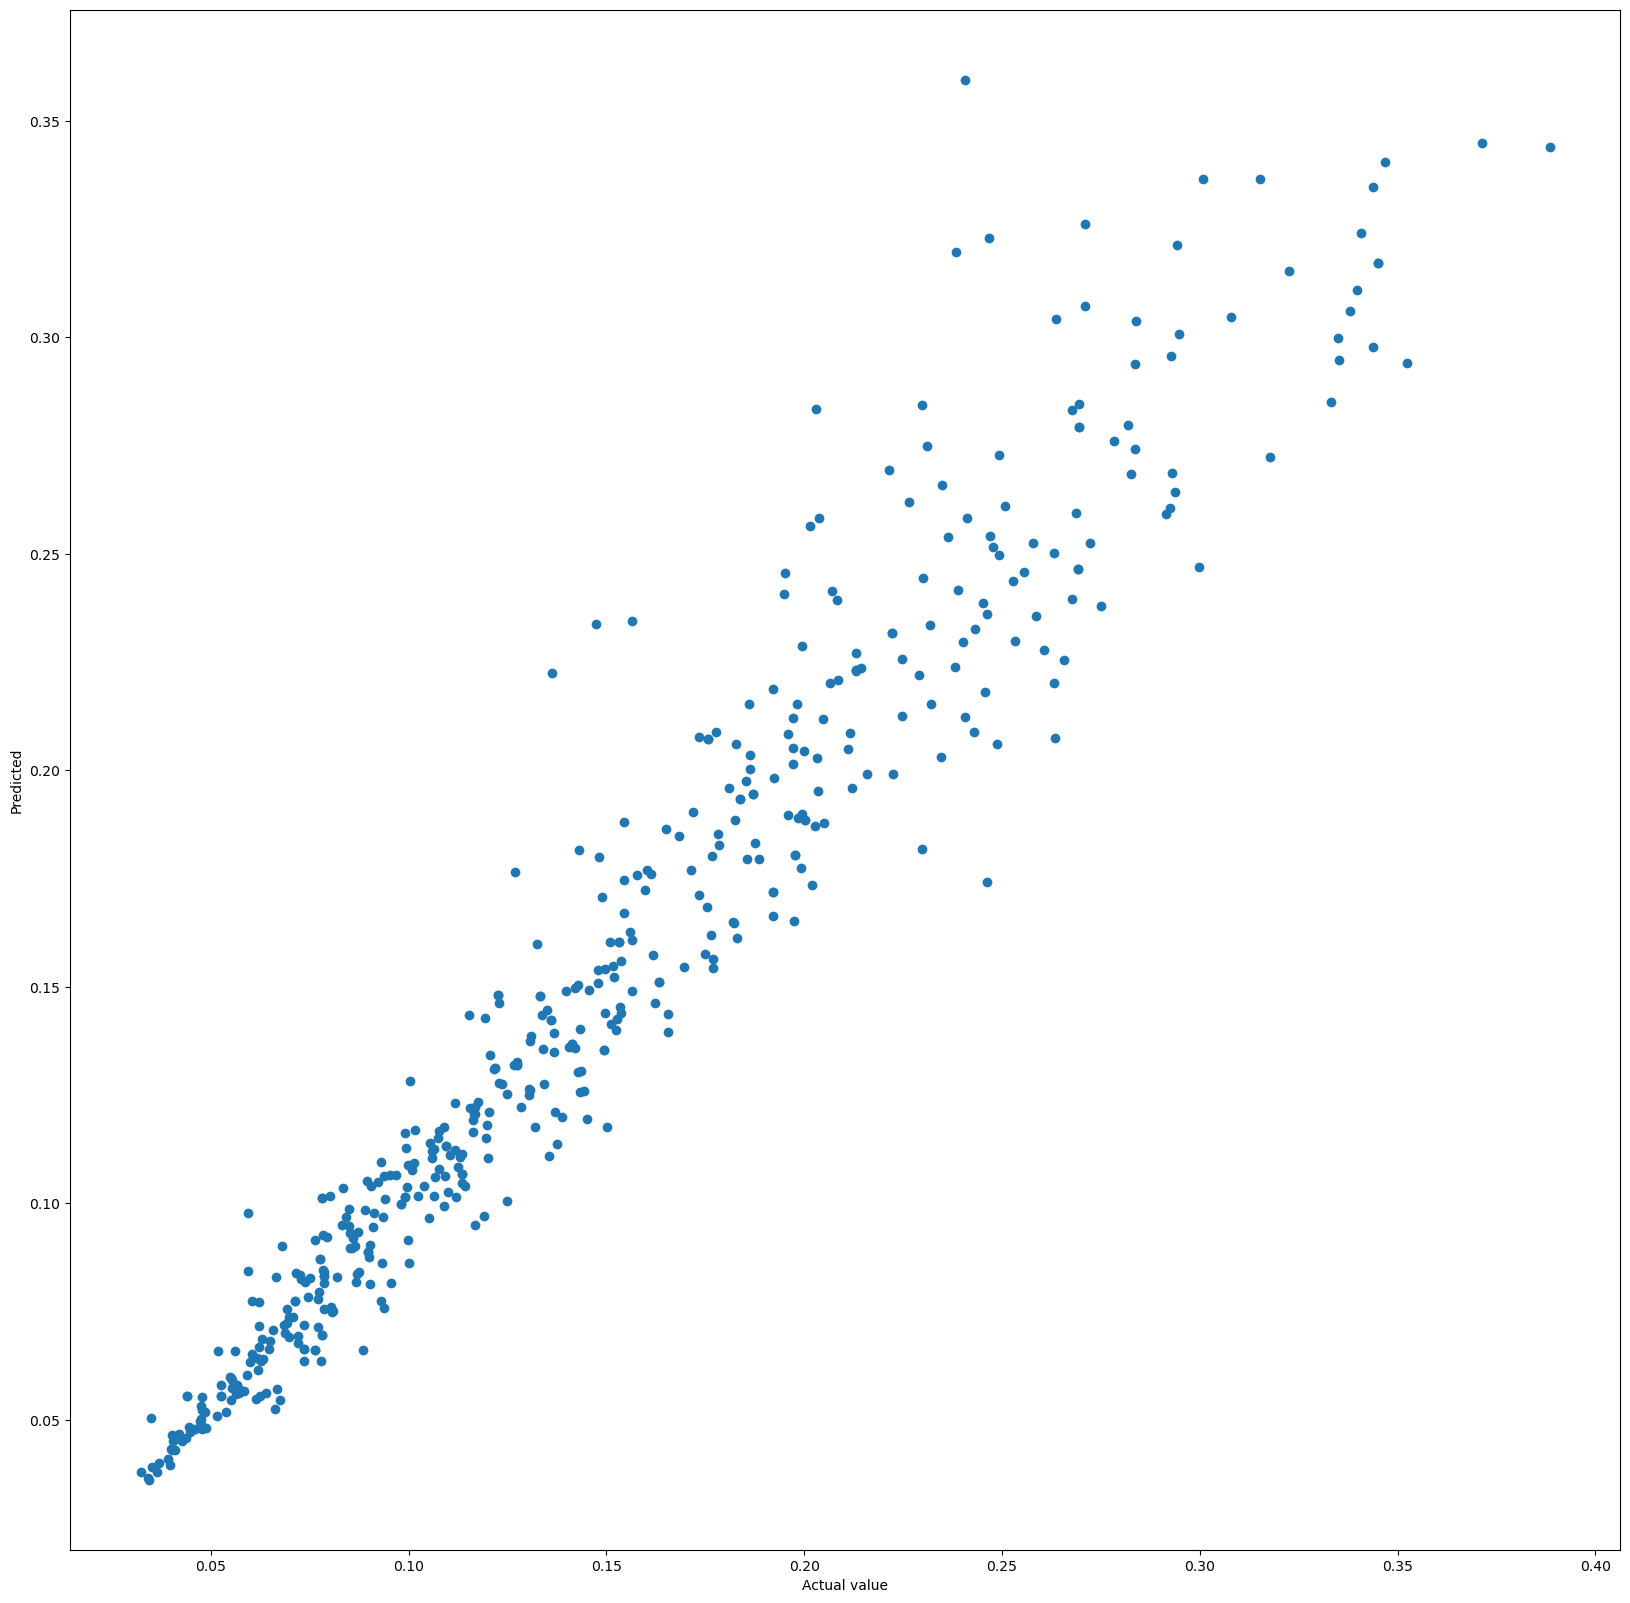

In [18]:
#Plot results
import matplotlib.pyplot as pl
pl.figure(figsize=(20,20))
pl.scatter(y_test,y_pred)
pl.xlabel("Actual value")
pl.ylabel("Predicted")

In [19]:
# support vector machines

In [20]:
# decision trees and multi-layer

In [21]:
# perceptron neural network.

In [22]:
# evaluation

# CLASSIFICATION

In [23]:
# import classifcation data set
df=pd.read_csv('adult.csv', index_col=False)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Sum                  0
dtype: int64

In [24]:
# clean data

dfclean = df.dropna() # Drops rows with empty values
dfclean.isnull().sum()
dfclean.loc[dfclean['Age'] > 80].shape[0]
#dfclean[dfclean.Age >80].sum
#sns.boxplot(dfclean['Age'])

#data_mean = df.iloc[:, :]
#data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
#sharey=False, fontsize=12, figsize=(15,20))

75

In [25]:
dfclean.duplicated().sum()

23

In [26]:
dfdropd = dfclean.drop_duplicates()
dfdropd.duplicated().sum()

0

In [27]:
labelencoder = LabelEncoder()
dfcopy = dfdropd.copy()
#df1 = labelencoder.fit_transform(dfdropd['Sex'])
dfcopy['Race'] = labelencoder.fit_transform(dfcopy['Race'])
dfcopy['Sex'] = labelencoder.fit_transform(dfcopy['Sex'])
dfcopy['Occupation'] = labelencoder.fit_transform(dfcopy['Occupation'])
dfcopy['Relationship'] = labelencoder.fit_transform(dfcopy['Relationship'])
dfcopy['Marital-Status'] = labelencoder.fit_transform(dfcopy['Marital-Status'])
dfcopy['Education'] = labelencoder.fit_transform(dfcopy['Education'])
dfcopy['Workclass'] = labelencoder.fit_transform(dfcopy['Workclass'])
dfcopy['Native-country'] = labelencoder.fit_transform(dfcopy['Native-country'])
dfcopy['Sum'] = labelencoder.fit_transform(dfcopy['Sum'])
dfcopy

#dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [28]:
X = dfcopy[['Fnlwgt']]
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfcopy['Fnlwgt'] = scaler.fit_transform(X)
data = dfcopy
dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,-1.062676,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,-1.007829,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,0.244669,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,0.425206,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,1.406572,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0.638926,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,-0.335246,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,-0.358567,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,0.110688,11,9,4,0,3,4,1,0,0,20,38,0


In [29]:
# logistic regression

In [30]:
# support vector machines

In [31]:
# split into X and y
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']
# split X and y into training and test sets, test set 30% of data 
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85,
random_state=1, stratify=y)

In [32]:
# First try SVM with all features selected 


svclassifier = SVC(C=1.0,degree=3, gamma='auto', probability=True)
svclassifier.fit(X_train, y_train)



SVC(gamma='auto', probability=True)

In [33]:
y_pred = svclassifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     19239
           1       0.64      0.20      0.30      6380

    accuracy                           0.77     25619
   macro avg       0.71      0.58      0.58     25619
weighted avg       0.75      0.77      0.72     25619



In [35]:
classifier_score = svclassifier.score(X_test, y_test)
print(f"Classifier Score is {classifier_score}")

Classifier Score is 0.7727467894921738


In [36]:
# Try dropping features
# Drop Capital-gain and capital-loss due to low variability 
# Drop Education due to Education-num encoding similar data 
# Drop Native-country for low variability (mostly U.S)
# Drop Race for having lowest Chi-Squared statistic 

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
df_reduced.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-Status,Occupation,Relationship,Sex,Hours-per-week,Sum
0,39,5,-1.062676,13,4,0,1,1,40,0
1,50,4,-1.007829,13,2,3,0,1,13,0
2,38,2,0.244669,9,0,5,1,1,40,0
3,53,2,0.425206,7,2,5,0,1,40,0
4,28,2,1.406572,13,2,9,5,0,40,0


In [37]:
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.85,
random_state=1, stratify=y1)

In [38]:
svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X1_train, y1_train)

SVC(gamma='auto', probability=True)

In [39]:
y1_pred = svclassifier.predict(X1_test)

In [40]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     19239
           1       0.67      0.37      0.48      6380

    accuracy                           0.80     25619
   macro avg       0.75      0.66      0.68     25619
weighted avg       0.78      0.80      0.78     25619



In [41]:
## precision for 0 (<=50k) has increased however the precision for 1 (50k >) has decreased

classifier_score1 = svclassifier.score(X1_test, y1_test)
print(f"Classifier Score is {classifier_score1}")

Classifier Score is 0.7990553885787892


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# model with just 3 best features selected (k=3)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=3)),
 ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

<<<<<<< local


[0.81702057 0.82149967 0.82465163 0.82929662 0.81898125]
Average score and standard deviation: (82.23 +- 0.194)%


NameError: name 'SVC' is not defined

>>>>>>> remote


In [2]:
# decision trees and multi-layer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sum',axis=1), data['Sum'], test_size=.3,random_state=23)
clf = DecisionTreeClassifier(random_state=1)
dtt = clf.fit(X_train, y_train)
predictions = dtt.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))



NameError: name 'data' is not defined

In [4]:
# perceptron neural network.

In [5]:
#Analysis

In [6]:
# create df of the numerical values and Sum to create multiple boxplots

df_numerical = dfdropd[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sum']].copy()

df_numerical.head()

NameError: name 'dfdropd' is not defined

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

for i, col in enumerate(df_numerical.columns[0:6]):
    _= sns.boxplot(y=col, x='Sum', data=df_numerical, ax=axes[i])

NameError: name 'plt' is not defined

In [8]:
# from the boxplots it looks like fnlwgt is similar for both classes, so we may potentially drop that feature.
# also, captital-gain and capital-loss are mostly zero for both classes, so we could drop these as well due to low variability

#Now try to plot the categorical features 
#look at value counts first 

categorical_cols = ['Workclass', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

for col in categorical_cols:
    vals = dfdropd[[col]].value_counts()
    print(vals)
    
# data is skewed towards private sector, white race, males, and United States

NameError: name 'dfdropd' is not defined

In [9]:
# will use histograms for all categorical features bar countries 
first_dim = 'Sum' 
second_dim = 'Sex'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# males tend to earn more than 50k however the data is skewed towards males 

NameError: name 'sns' is not defined

In [10]:
first_dim = 'Sum' 
second_dim = 'Race'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# again, data is heavily skewed towards White so hard to tell

NameError: name 'sns' is not defined

In [11]:
first_dim = 'Sum' 
second_dim = 'Relationship'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# can see husbands are more likely to earn over 50k, not-in-family and own child less likely - important feature

NameError: name 'sns' is not defined

In [12]:
first_dim = 'Sum' 
second_dim = 'Marital-Status'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# Married-civ-spouse most liekly to earn over 50k, never-married and divorsed less likely, rest of data is smaller 
# in comparison 

NameError: name 'sns' is not defined

In [13]:
first_dim = 'Sum' 
second_dim = 'Workclass'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
#data skewed towards private secotr so hard to make judgement, similar results for both classes

NameError: name 'sns' is not defined

In [14]:
first_dim = 'Sum' 
second_dim = 'Occupation'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )

# exec- managerial and prof-speciality both most likely to earn over 50k, data well spread out - important feature. 

NameError: name 'sns' is not defined

In [15]:
# evaluation